In [2]:
import warnings 
warnings.filterwarnings('ignore')

# basic libraries
import os
import numpy as np
import pandas as pd


#visulaization modules
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
# import plotly.graph_objs as go

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, 
                             auc, 
                             precision_score,
                             recall_score,
                             f1_score, 
                             roc_auc_score,
                             confusion_matrix)


# model algorithams
from sklearn.ensemble import (RandomForestClassifier, 
                              AdaBoostClassifier, 
                              GradientBoostingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [4]:
df = pd.read_csv("health_clean.csv")
df

,Age,Gender,Self_Employed,Family_History,Treatment,Work_Interfere,Employee_Count_Company,Remote_Work,Tech_Company,Benefits,...,Anonymity,Medical_Leave,Mental_Health_Consequence,Physical_Health_Consequence,Coworkers_Reach,Supervisor_Reach,Mental_Health_Interview,Physical_Health_Interview,Mental_VS_Physical,Observed_Consequence_Workplace
0,26,0,0,1,1,3,3,0,1,1,...,1,0,2,0,2,0,0,2,2,0
1,29,0,0,1,1,3,2,1,0,2,...,2,0,2,0,2,1,0,2,2,0
2,34,1,0,1,1,3,5,0,1,2,...,1,4,0,0,2,1,0,2,1,0
3,29,1,0,1,1,0,3,0,1,2,...,2,0,2,2,0,0,0,0,0,0
4,36,1,0,0,1,3,2,0,1,1,...,2,0,2,0,2,2,0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,35,1,0,0,0,3,2,1,1,2,...,2,0,0,0,2,1,2,2,2,0
1996,31,1,0,0,0,3,5,1,1,1,...,1,4,0,0,2,1,2,1,1,0
1997,43,1,1,0,0,3,5,1,1,2,...,2,0,0,0,2,1,0,2,2,0
1998,39,1,0,0,0,3,0,1,1,0,...,2,3,2,2,2,1,2,2,0,0


In [5]:
df.head()

,Age,Gender,Self_Employed,Family_History,Treatment,Work_Interfere,Employee_Count_Company,Remote_Work,Tech_Company,Benefits,...,Anonymity,Medical_Leave,Mental_Health_Consequence,Physical_Health_Consequence,Coworkers_Reach,Supervisor_Reach,Mental_Health_Interview,Physical_Health_Interview,Mental_VS_Physical,Observed_Consequence_Workplace
0,26,0,0,1,1,3,3,0,1,1,...,1,0,2,0,2,0,0,2,2,0
1,29,0,0,1,1,3,2,1,0,2,...,2,0,2,0,2,1,0,2,2,0
2,34,1,0,1,1,3,5,0,1,2,...,1,4,0,0,2,1,0,2,1,0
3,29,1,0,1,1,0,3,0,1,2,...,2,0,2,2,0,0,0,0,0,0
4,36,1,0,0,1,3,2,0,1,1,...,2,0,2,0,2,2,0,2,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Age                             2000 non-null   int64
 1   Gender                          2000 non-null   int64
 2   Self_Employed                   2000 non-null   int64
 3   Family_History                  2000 non-null   int64
 4   Treatment                       2000 non-null   int64
 5   Work_Interfere                  2000 non-null   int64
 6   Employee_Count_Company          2000 non-null   int64
 7   Remote_Work                     2000 non-null   int64
 8   Tech_Company                    2000 non-null   int64
 9   Benefits                        2000 non-null   int64
 10  Care_Options                    2000 non-null   int64
 11  Wellness_Program                2000 non-null   int64
 12  Seek_Help                       2000 non-null   int64
 13  Ano

In [7]:
df.isnull().sum()

Age                               0
Gender                            0
Self_Employed                     0
Family_History                    0
Treatment                         0
Work_Interfere                    0
Employee_Count_Company            0
Remote_Work                       0
Tech_Company                      0
Benefits                          0
Care_Options                      0
Wellness_Program                  0
Seek_Help                         0
Anonymity                         0
Medical_Leave                     0
Mental_Health_Consequence         0
Physical_Health_Consequence       0
Coworkers_Reach                   0
Supervisor_Reach                  0
Mental_Health_Interview           0
Physical_Health_Interview         0
Mental_VS_Physical                0
Observed_Consequence_Workplace    0
dtype: int64

In [8]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Work_Interfere'].fillna(df['Work_Interfere'].mode()[0], inplace=True)


<a id = '2.0'> </a>

<a id='3.1'>

In [9]:
# we want to make sure that the answers are limited to boolean-like values
columns_to_print = ['Self_Employed', 'Family_History','Treatment', 'Work_Interfere', 'Employee_Count_Company', 'Remote_Work',
                    'Tech_Company', 'Benefits', 'Care_Options', 'Wellness_Program',
                    'Seek_Help', 'Anonymity', 'Medical_Leave', 'Mental_Health_Consequence',
                    'Physical_Health_Consequence', 'Coworkers_Reach', 'Supervisor_Reach',
                    'Mental_Health_Interview', 'Physical_Health_Interview', 'Mental_VS_Physical',
                    'Observed_Consequence_Workplace']

for column in columns_to_print:
    print(f"{column}:")
    print(df[column].value_counts())
    print() 

Self_Employed:
Self_Employed
0    1757
1     243
Name: count, dtype: int64

Family_History:
Family_History
0    1199
1     801
Name: count, dtype: int64

Treatment:
Treatment
1    1000
0    1000
Name: count, dtype: int64

Work_Interfere:
Work_Interfere
3    1169
0     332
2     276
1     223
Name: count, dtype: int64

Employee_Count_Company:
Employee_Count_Company
1    460
5    447
2    437
0    278
3    270
4    108
Name: count, dtype: int64

Remote_Work:
Remote_Work
0    1372
1     628
Name: count, dtype: int64

Tech_Company:
Tech_Company
1    1677
0     323
Name: count, dtype: int64

Benefits:
Benefits
1    752
2    630
0    618
Name: count, dtype: int64

Care_Options:
Care_Options
0    793
1    724
2    483
Name: count, dtype: int64

Wellness_Program:
Wellness_Program
0    1322
1     365
2     313
Name: count, dtype: int64

Seek_Help:
Seek_Help
0    1019
2     590
1     391
Name: count, dtype: int64

Anonymity:
Anonymity
2    1289
1     615
0      96
Name: count, dtype: int64

Medi

### Category Data Encoding

In [10]:
df['Observed_Consequence_Workplace'].value_counts()

Observed_Consequence_Workplace
0    1713
1     287
Name: count, dtype: int64

In [11]:
df["Observed_Consequence_Workplace"]=df["Observed_Consequence_Workplace"].str.replace("Yes","1")
df["Observed_Consequence_Workplace"]=df["Observed_Consequence_Workplace"].str.replace("No","0")
df["Observed_Consequence_Workplace"]=df["Observed_Consequence_Workplace"].astype("int32")


AttributeError: Can only use .str accessor with string values!

In [ ]:
df["Mental_VS_Physical"]=df["Mental_VS_Physical"].str.replace("Yes","1")
df["Mental_VS_Physical"]=df["Mental_VS_Physical"].str.replace("No","0")
df["Mental_VS_Physical"]=df["Mental_VS_Physical"].str.replace("Don't know","2")

df["Mental_VS_Physical"]=df["Mental_VS_Physical"].astype("int32")

In [ ]:
df["Physical_Health_Interview"]=df["Physical_Health_Interview"].str.replace("Yes","1")
df["Physical_Health_Interview"]=df["Physical_Health_Interview"].str.replace("No","0")
df["Physical_Health_Interview"]=df["Physical_Health_Interview"].str.replace("Maybe","2")

df["Physical_Health_Interview"]=df["Physical_Health_Interview"].astype("int32")

In [ ]:
df["Mental_Health_Interview"]=df["Mental_Health_Interview"].str.replace("Yes","1")
df["Mental_Health_Interview"]=df["Mental_Health_Interview"].str.replace("No","0")
df["Mental_Health_Interview"]=df["Mental_Health_Interview"].str.replace("Maybe","2")

df["Mental_Health_Interview"]=df["Mental_Health_Interview"].astype("int32")

In [12]:
df["Supervisor_Reach"]=df["Supervisor_Reach"].str.replace("Yes","1")
df["Supervisor_Reach"]=df["Supervisor_Reach"].str.replace("No","0")
df["Supervisor_Reach"]=df["Supervisor_Reach"].str.replace("Some of them","2")

df["Supervisor_Reach"]=df["Supervisor_Reach"].astype("int32")

AttributeError: Can only use .str accessor with string values!

In [13]:
df["Coworkers_Reach"]=df["Coworkers_Reach"].str.replace("Yes","1")
df["Coworkers_Reach"]=df["Coworkers_Reach"].str.replace("No","0")
df["Coworkers_Reach"]=df["Coworkers_Reach"].str.replace("Some of them","2")

df["Coworkers_Reach"]=df["Coworkers_Reach"].astype("int32")

AttributeError: Can only use .str accessor with string values!

In [14]:
df["Physical_Health_Consequence"]=df["Physical_Health_Consequence"].str.replace("Yes","1")
df["Physical_Health_Consequence"]=df["Physical_Health_Consequence"].str.replace("No","0")
df["Physical_Health_Consequence"]=df["Physical_Health_Consequence"].str.replace("Maybe","2")

df["Physical_Health_Consequence"]=df["Physical_Health_Consequence"].astype("int32")

AttributeError: Can only use .str accessor with string values!

In [ ]:
df["Mental_Health_Consequence"]=df["Mental_Health_Consequence"].str.replace("Yes","1")
df["Mental_Health_Consequence"]=df["Mental_Health_Consequence"].str.replace("No","0")
df["Mental_Health_Consequence"]=df["Mental_Health_Consequence"].str.replace("Maybe","2")

df["Mental_Health_Consequence"]=df["Mental_Health_Consequence"].astype("int32")

In [ ]:
df["Medical_Leave"]=df["Medical_Leave"].str.replace("Don't know","0")
df["Medical_Leave"]=df["Medical_Leave"].str.replace("Somewhat difficult","1")
df["Medical_Leave"]=df["Medical_Leave"].str.replace("Somewhat easy","2")
df["Medical_Leave"]=df["Medical_Leave"].str.replace("Very difficult","3")
df["Medical_Leave"]=df["Medical_Leave"].str.replace("Very easy","4")


df["Medical_Leave"]=df["Medical_Leave"].astype("int32")

In [ ]:
df["Anonymity"]=df["Anonymity"].str.replace("Yes","1")
df["Anonymity"]=df["Anonymity"].str.replace("No","0")
df["Anonymity"]=df["Anonymity"].str.replace("Don't know","2")

df["Anonymity"]=df["Anonymity"].astype("int32")

In [ ]:
df["Seek_Help"]=df["Seek_Help"].str.replace("Yes","1")
df["Seek_Help"]=df["Seek_Help"].str.replace("No","0")
df["Seek_Help"]=df["Seek_Help"].str.replace("Don't know","2")

df["Seek_Help"]=df["Seek_Help"].astype("int32")

In [ ]:
df["Wellness_Program"]=df["Wellness_Program"].str.replace("Yes","1")
df["Wellness_Program"]=df["Wellness_Program"].str.replace("No","0")
df["Wellness_Program"]=df["Wellness_Program"].str.replace("Don't know","2")

df["Wellness_Program"]=df["Wellness_Program"].astype("int32")

In [ ]:
df["Care_Options"] = df["Care_Options"].replace("Yes", "1")
df["Care_Options"] = df["Care_Options"].replace("No", "0")
df["Care_Options"] = df["Care_Options"].replace("Not sure", "2")

# Convert to int32, ignoring errors to handle unexpected values
df["Care_Options"] = pd.to_numeric(df["Care_Options"], errors="coerce").astype("Int32")


In [ ]:
df["Benefits"]=df["Benefits"].str.replace("Yes","1")
df["Benefits"]=df["Benefits"].str.replace("No","0")
df["Benefits"]=df["Benefits"].str.replace("Don't know","2")

df["Benefits"]=df["Benefits"].astype("int32")

In [ ]:

df["Tech_Company"]=df["Tech_Company"].str.replace("Yes","1")
df["Tech_Company"]=df["Tech_Company"].str.replace("No","0")
df["Tech_Company"]=df["Tech_Company"].astype("int32")

In [ ]:

df["Remote_Work"]=df["Remote_Work"].str.replace("Yes","1")
df["Remote_Work"]=df["Remote_Work"].str.replace("No","0")
df["Remote_Work"]=df["Remote_Work"].astype("int32")

In [ ]:
df["Employee_Count_Company"] = df["Employee_Count_Company"].str.replace("1-5", "0")
df["Employee_Count_Company"] = df["Employee_Count_Company"].str.replace("6-25", "1")
df["Employee_Count_Company"] = df["Employee_Count_Company"].str.replace("26-100", "2")
df["Employee_Count_Company"] = df["Employee_Count_Company"].str.replace("100-500", "3")
df["Employee_Count_Company"] = df["Employee_Count_Company"].str.replace("500-1000", "4")
df["Employee_Count_Company"] = df["Employee_Count_Company"].str.replace("More than 1000", "5")

df["Employee_Count_Company"] = df["Employee_Count_Company"].astype("int32")


In [ ]:
df["Work_Interfere"]=df["Work_Interfere"].str.replace("Never","0")
df["Work_Interfere"]=df["Work_Interfere"].str.replace("Often","1")
df["Work_Interfere"]=df["Work_Interfere"].str.replace("Rarely","2")
df["Work_Interfere"]=df["Work_Interfere"].str.replace("Sometimes","3")

df["Work_Interfere"]=df["Work_Interfere"].astype("int32")

In [ ]:
df['Self_Employed'].value_counts()

df["Self_Employed"]=df["Self_Employed"].str.replace("Yes","1")
df["Self_Employed"]=df["Self_Employed"].str.replace("No","0")
df["Self_Employed"]=df["Self_Employed"].astype("int32")

In [ ]:
df["Gender"]=df["Gender"].str.replace("Male","1")
df["Gender"]=df["Gender"].str.replace("Female","0")
df["Gender"]=df["Gender"].str.replace("Queer","2")

df["Gender"]=df["Gender"].astype("int32")

In [ ]:
df['Family_History'].value_counts()
df["Family_History"]=df["Family_History"].str.replace("No","0")
df["Family_History"]=df["Family_History"].str.replace("Yes","1")

df["Family_History"]=df["Family_History"].astype("int32")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Age                             2000 non-null   int64
 1   Gender                          2000 non-null   int64
 2   Self_Employed                   2000 non-null   int64
 3   Family_History                  2000 non-null   int64
 4   Treatment                       2000 non-null   int64
 5   Work_Interfere                  2000 non-null   int64
 6   Employee_Count_Company          2000 non-null   int64
 7   Remote_Work                     2000 non-null   int64
 8   Tech_Company                    2000 non-null   int64
 9   Benefits                        2000 non-null   int64
 10  Care_Options                    2000 non-null   int64
 11  Wellness_Program                2000 non-null   int64
 12  Seek_Help                       2000 non-null   int64
 13  Ano

In [ ]:
df.Treatment.value_counts()

Treatment
1    637
0    622
Name: count, dtype: int64

In [ ]:
# df.to_csv('mentalh.csv',index =False)

In [16]:
X= df.drop('Treatment',axis = 1)
y = df['Treatment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y ,random_state=42)


In [ ]:

import pandas as pd
dfmin= df[df['Treatment'] == 1]
dfmax= df[df['Treatment'] == 0]
from sklearn.utils import resample
dfminu = resample(dfmin, replace=True, n_samples =1000,random_state=123)
dfmaxd = resample(dfmax, replace=True, n_samples =1000,random_state=123)
df_dsampled = pd.concat([dfminu,dfmaxd])
df_dsampled['Treatment'].value_counts()

# Now, X_oversample and y_oversample should be of the same type as X and y, respectively

X=df_dsampled.drop("Treatment",axis=1)
# dependent feature
y=df_dsampled["Treatment"]

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y ,random_state=42)

In [ ]:
df_dsampled.to_csv('health_clean.csv',index=False)

In [ ]:
df_dsampled['Treatment'].value_counts()


Treatment
1    1000
0    1000
Name: count, dtype: int64

In [17]:

# from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#ML models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [18]:
# decision Tree


DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score

# y_predict = DT.predict(X_test)
print('*'*20)

# prediction
train_pred=DT.predict(X_train)
test_pred= DT.predict(X_test)
print('*'*20)
# accuracy
print('Train accuracy:' , accuracy_score(y_train,train_pred))
print('Test accuracy:' , accuracy_score(y_test,test_pred))

print('*'*20)
 # cross validation   
score= cross_val_score(DT,X,y,cv=5)
print(score)
print(score.mean())

print('*'*20)
#  prediction Summary by species
print(classification_report(y_test, test_pred))

print('*'*20)
# Accuracy score
DT_SC = accuracy_score(test_pred,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

print('*'*20)



********************
********************
Train accuracy: 1.0
Test accuracy: 0.87
********************
[0.8925 0.9275 0.915  0.88   0.9225]
0.9075
********************
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       300
           1       0.85      0.89      0.87       300

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600

********************
87.0% Accurate
********************


In [19]:
# random forest

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)
print('*'*20)

# prediction
train_prediction= rfc.predict(X_train)
test_prediction= rfc.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,X,y,cv=5)
print(score.mean())
print('*'*20)

#  prediction Summary by species
# print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
RF_SC = accuracy_score(test_prediction,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

********************
********************
test accuracy: 0.92
train accuracy: 1.0
********************
0.923
********************
********************
92.0% Accurate


In [20]:

# logistic regression

LR = LogisticRegression()
LR.fit(X_train, y_train)


# prediction
train_prediction= LR.predict(X_train)
test_prediction= LR.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(LR,X,y,cv=5)
print(score.mean())
print('*'*20)

print(classification_report(y_test,test_pred))

print('*'*20)


lr_HSC = accuracy_score(y_test,test_prediction)
print(f"{round(lr_HSC*100,2)}% Accurate")

********************
test accuracy: 0.7266666666666667
train accuracy: 0.7207142857142858
********************
0.709
********************
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       300
           1       0.85      0.89      0.87       300

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600

********************
72.67% Accurate


In [21]:
#  XGBoost

XGB = XGBClassifier()
XGB.fit(X_train, y_train)

# prediction
train_prediction= XGB.predict(X_train)
test_prediction= XGB.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(XGB,X,y,cv=5)
print(score.mean())
print('*'*20)

print(classification_report(y_test,test_pred))

print('*'*20)


XGB_HSC = accuracy_score(y_test,test_prediction)
print(f"{round(XGB_HSC*100,2)}% Accurate")

********************
test accuracy: 0.925
train accuracy: 1.0
********************
0.9165000000000001
********************
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       300
           1       0.85      0.89      0.87       300

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600

********************
92.5% Accurate


In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create AdaBoostClassifier
ada = AdaBoostClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    # Add other hyperparameters you want to tune
}

# Create GridSearchCV object
grid_search = GridSearchCV(ada, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_ada_model = grid_search.best_estimator_

# Prediction
train_prediction = best_ada_model.predict(X_train)
test_prediction = best_ada_model.predict(X_test)

# Evaluation
print('*'*20)
print('Test accuracy:', accuracy_score(y_test, test_prediction))
print('Train accuracy:', accuracy_score(y_train, train_prediction))
print('*'*20)

# Cross-validation score
best_score = grid_search.best_score_
print(f"Best Cross-validation Score: {best_score:.4f}")
print('*'*20)

# Prediction Summary by species
# print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
ada_h = accuracy_score(test_prediction, y_test)
print(f"{round(ada_h*100, 2)}% Accurate")


Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200}
********************
Test accuracy: 0.785
Train accuracy: 0.7792857142857142
********************
Best Cross-validation Score: 0.7743
********************
********************
78.5% Accurate


In [23]:
from sklearn.ensemble import GradientBoostingClassifier
# random forest

gbc=GradientBoostingClassifier(random_state=42)
gbc.fit(X_train,y_train)
print('*'*20)

# prediction
train_prediction= gbc.predict(X_train)
test_prediction= gbc.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(gbc,X,y,cv=5)
print(score.mean())
print('*'*20)

#  prediction Summary by species
# print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
gbc_h = accuracy_score(test_prediction,y_test)
print(f"{round(gbc_h*100,2)}% Accurate")

********************
********************
test accuracy: 0.84
train accuracy: 0.8628571428571429
********************
0.834
********************
********************
84.0% Accurate


In [24]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Convert X_train and X_test to NumPy arrays
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)

# Model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_np, y_train)

# Prediction
train_prediction = knn_model.predict(X_train_np)
test_prediction = knn_model.predict(X_test_np)

# Evaluation
print('*'*20)
from sklearn.metrics import accuracy_score
print('Test accuracy:', accuracy_score(y_test, test_prediction))
print('Train accuracy:', accuracy_score(y_train, train_prediction))

print('*'*20)
result = confusion_matrix(y_test, test_prediction)
print("Confusion Matrix:")
print(result)

print('*'*20)
# Prediction Summary by species
print(classification_report(y_test, test_prediction))

print('*'*20)
# Accuracy score
Knn_SC = accuracy_score(test_prediction, y_test)
print(f"{round(Knn_SC*100, 2)}% Accurate")


********************
Test accuracy: 0.7066666666666667
Train accuracy: 0.84
********************
Confusion Matrix:
[[205  95]
 [ 81 219]]
********************
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       300
           1       0.70      0.73      0.71       300

    accuracy                           0.71       600
   macro avg       0.71      0.71      0.71       600
weighted avg       0.71      0.71      0.71       600

********************
70.67% Accurate


In [42]:
score = [DT_SC,RF_SC,lr_HSC,Knn_SC,XGB_HSC,ada_h,gbc_h]
Models = pd.DataFrame({
    'Model': ["Decision Tree","Random Forest", "Logistic Regression",'Knn','XGBoost','AdaBoost',"GradientBoostingClassifier"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,Model,Score
4,XGBoost,0.925000
1,Random Forest,0.920000
0,Decision Tree,0.870000
6,GradientBoostingClassifier,0.840000
5,AdaBoost,0.785000
2,Logistic Regression,0.726667
3,Knn,0.706667


In [43]:

rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)

# Get feature importance scores
feature_importances = rfc.feature_importances_

# Get the names of the features from your dataset
imp_feature=pd.DataFrame(index=X.columns,data=feature_importances,columns=['feature importance'])
imp_feature
# Create a DataFrame with feature names and their corresponding importances


,feature importance
Age,0.124700
Gender,0.031005
Self_Employed,0.014513
Family_History,0.106188
Work_Interfere,0.125394
Employee_Count_Company,0.063394
Remote_Work,0.025574
Tech_Company,0.017207
Benefits,0.053708
Care_Options,0.051134


In [44]:
imp_feature=imp_feature[imp_feature['feature importance']>0.04]
b=imp_feature.sort_values('feature importance')
b.index

Index(['Physical_Health_Interview', 'Medical_Leave', 'Care_Options',
       'Benefits', 'Employee_Count_Company', 'Family_History', 'Age',
       'Work_Interfere'],
      dtype='object')

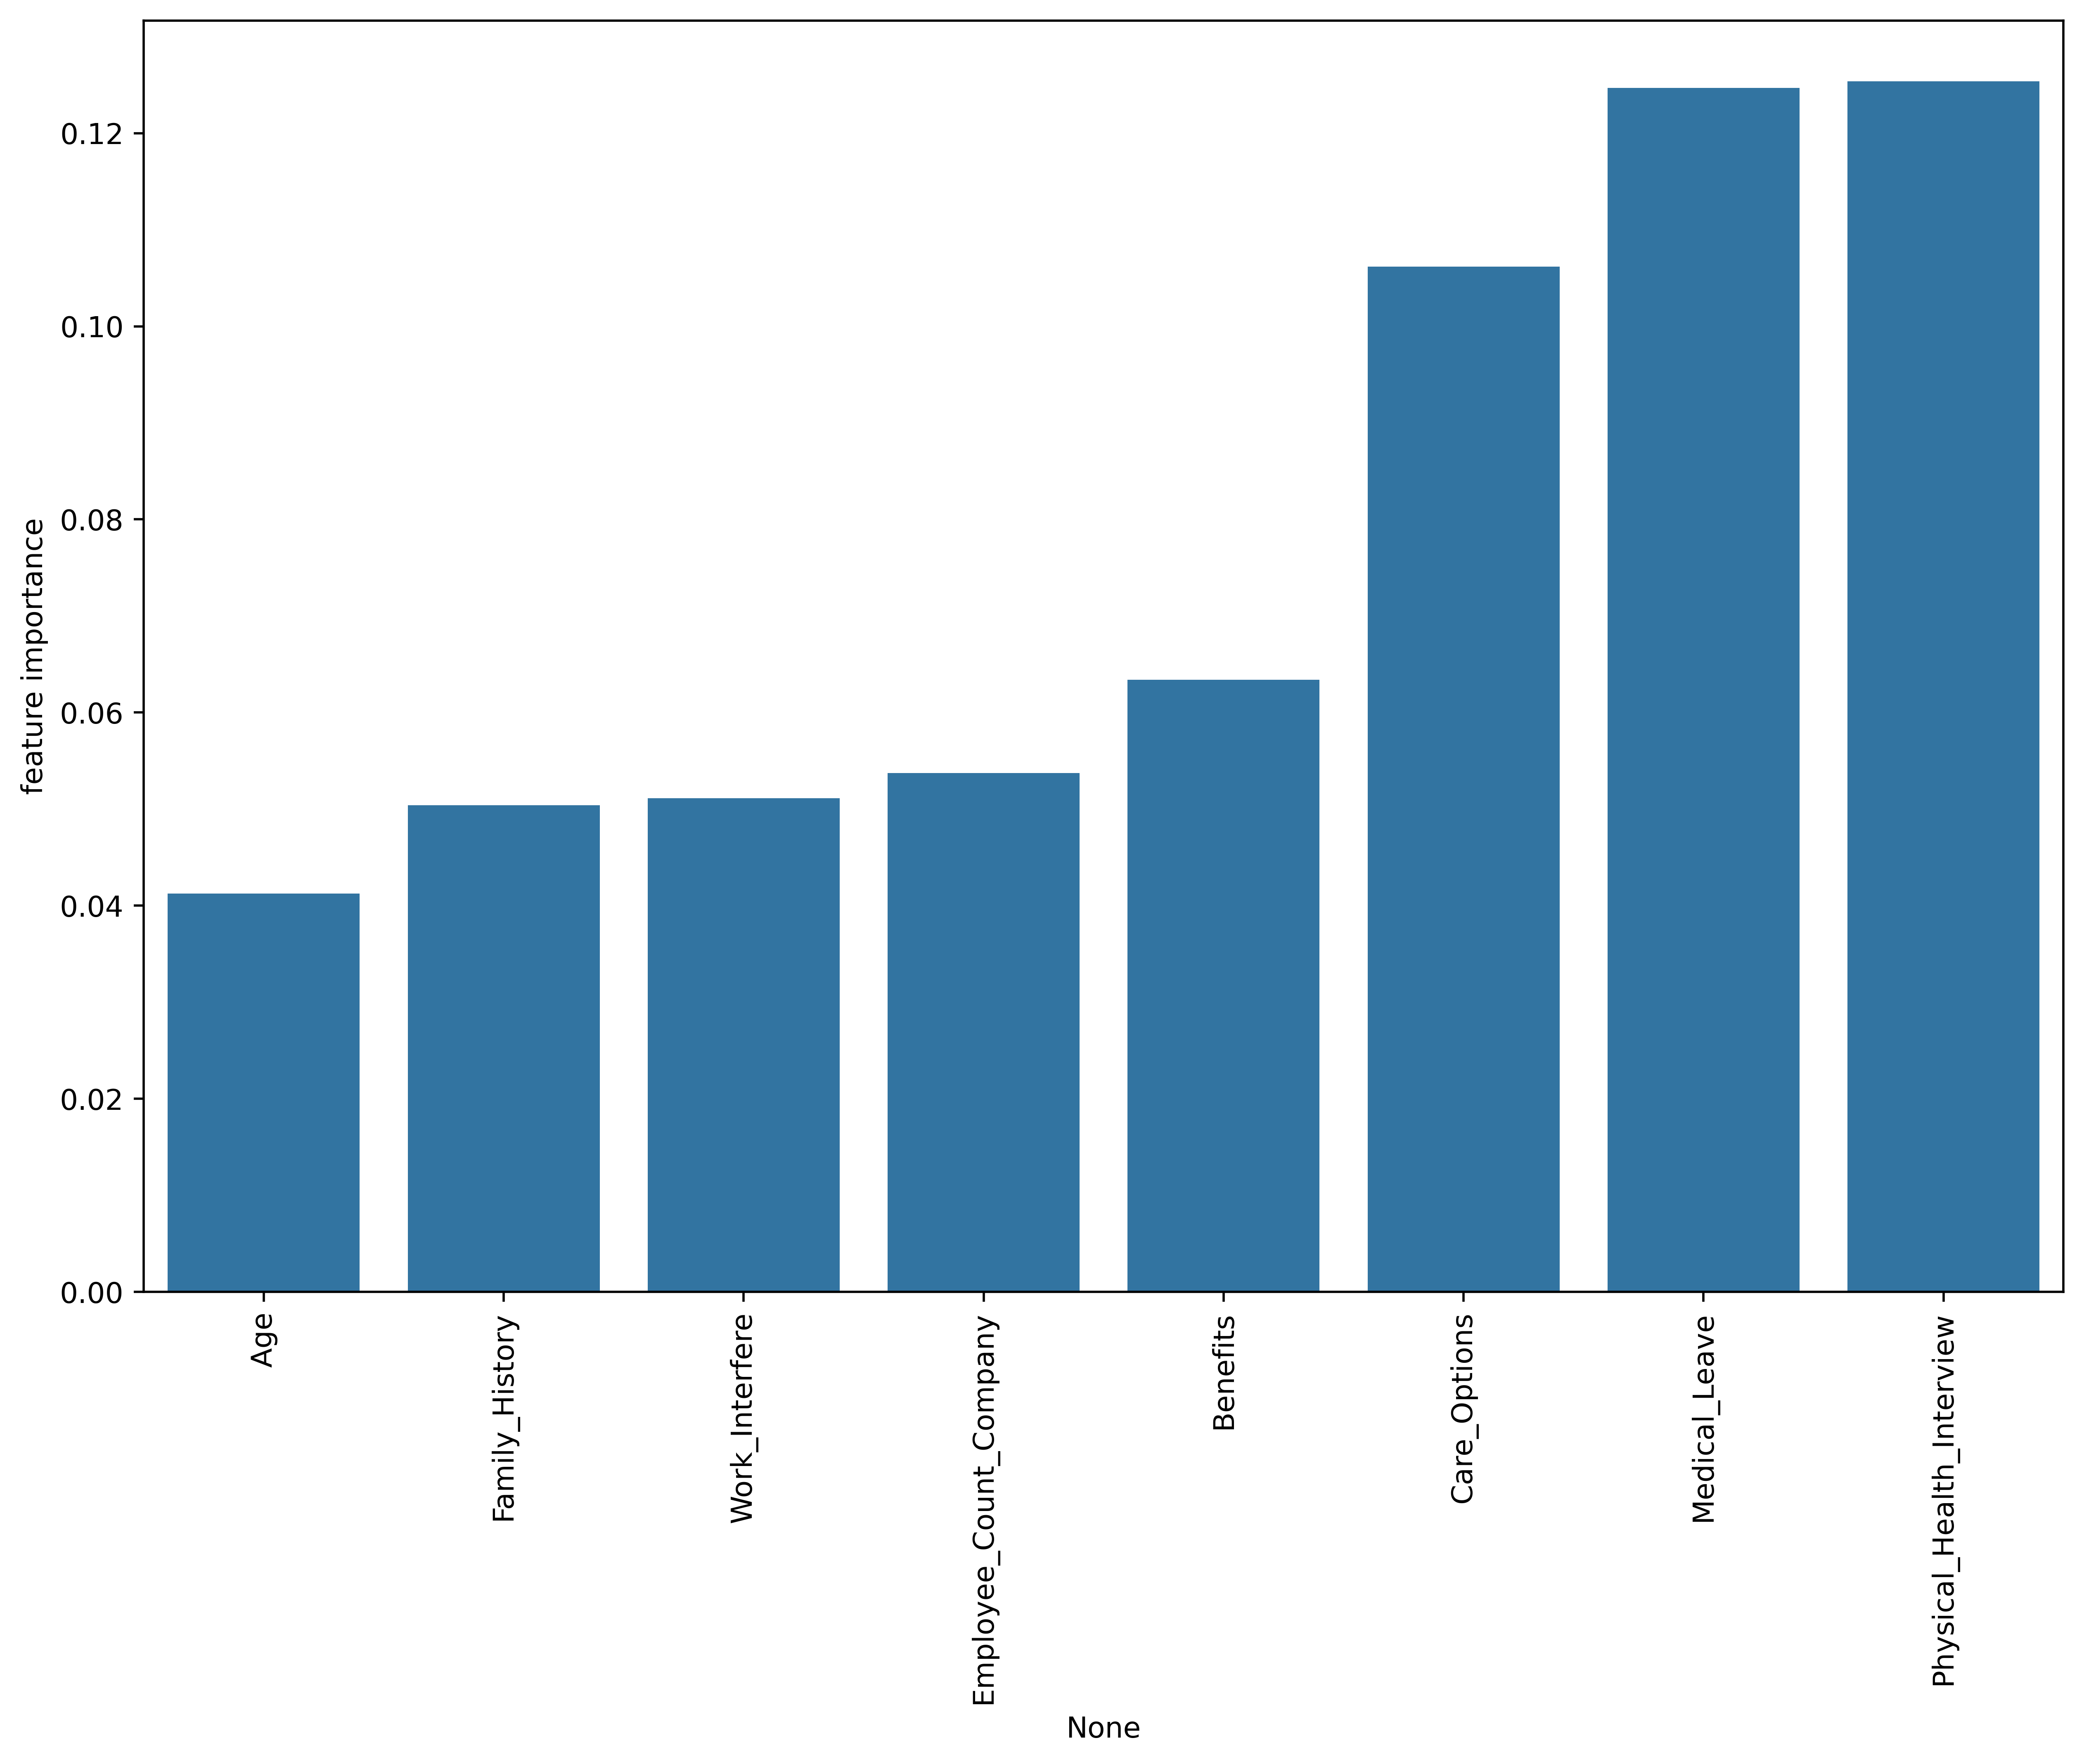

In [45]:
plt.figure(figsize=(12,8),dpi=(500))
sns.barplot(data=b,x=imp_feature.index,y='feature importance')
plt.xticks(rotation=90)
plt.show()

In [46]:
X=X[['Physical_Health_Interview', 'Medical_Leave', 'Care_Options',
       'Benefits', 'Employee_Count_Company', 'Family_History', 'Age',
       'Work_Interfere']]

In [47]:

import pandas as pd


from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.2)

In [48]:
# random forest

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)
print('*'*20)

# prediction
train_prediction= rfc.predict(X_train)
test_prediction= rfc.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,X,y,cv=5)
print(score.mean())
print('*'*20)

#  prediction Summary by species
# print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
RF_SC = accuracy_score(test_prediction,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

********************
********************
test accuracy: 0.915
train accuracy: 0.9975
********************
0.9145000000000001
********************
********************
91.5% Accurate


In [50]:
import pickle
#save the model
model = rfc  # Your machine learning model object
file_path = 'random.pkl'  # Path to the file where you want to save the model

with open(file_path, 'wb') as file:
    pickle.dump(model, file)


In [56]:
# load the model
import pickle

file_path = 'random.pkl'  # Path to the saved model file

with open(file_path, 'rb') as file:
    loaded_model = pickle.load(file)

['Mental_VS_Physical', 'Coworkers_Reach', 'Physical_Health_Interview',
       'Mental_Health_Consequence', 'Supervisor_Reach', 'Care_Options',
       'Medical_Leave', 'Benefits', 'Employee_Count_Company', 'Family_History',
       'Age', 'Work_Interfere']]

In [52]:
X_train


,Physical_Health_Interview,Medical_Leave,Care_Options,Benefits,Employee_Count_Company,Family_History,Age,Work_Interfere
0,2,0,2,1,3,1,26,3
816,2,3,1,1,5,1,27,1
790,2,2,1,1,5,0,29,2
361,2,0,0,2,1,0,29,2
592,0,2,1,1,5,1,33,2
...,...,...,...,...,...,...,...,...
1791,2,0,2,1,5,1,40,3
1096,2,4,0,0,1,0,30,0
1932,1,2,1,0,1,0,25,3
235,2,2,1,1,0,1,32,3


In [ ]:
# from sklearn.ensemble import AdaBoostClassifier
# import pickle

# # Assuming ada_model is an AdaBoostClassifier instance
# ada_model = AdaBoostClassifier(random_state=42)

# # Fit the model on your training data
# ada_model.fit(X_train, y_train)

# # Save the model
# file_path = 'ada_mhp.pkl'
# with open(file_path, 'wb') as file:
#     pickle.dump(ada_model, file)

# # Load the model
# with open(file_path, 'rb') as file:
#     loaded_model = pickle.load(file)

# # Now you can make predictions
# predictions = loaded_model.predict([[1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 0.0, 1.0, 2.0, 1.0, 35.0]])
# print(predictions)


[1]


In [59]:
predictions = loaded_model.predict([[2,	2,	6,	2,	3,	1,	6,	3]])
print(predictions)

[0]


<a id = '5'></a>

<a id = '5.1'>
    

<a id = '5.3'>